In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [5]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [7]:
print(df_train.shape,df_test.shape)

(103904, 25) (25976, 25)


In [9]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
all_features=df_train.columns.tolist()

In [13]:
categorical_features=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 
                'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
                'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                'Inflight service', 'Cleanliness', 'satisfaction']
num_features= [ f for f in all_features if f not in categorical_features]
print("Numeric Fea:",num_features)
df_train[num_features].describe().round(1).T

Numeric Fea: ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.5,29994.6,0.0,25975.8,51951.5,77927.2,103903.0
id,103904.0,64924.2,37463.8,1.0,32533.8,64856.5,97368.2,129880.0
Age,103904.0,39.4,15.1,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.4,997.1,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.8,38.2,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.2,38.7,0.0,0.0,0.0,13.0,1584.0


In [15]:
df_train[["Unnamed: 0","id"]].head()

,Unnamed: 0,id
0,0,70172
1,1,5047
2,2,110028
3,3,24026
4,4,119299


In [17]:
df_test[["Unnamed: 0","id"]].head()

,Unnamed: 0,id
0,0,19556
1,1,90035
2,2,12360
3,3,77959
4,4,36875


In [19]:
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)
df_train.drop(columns=["id"], errors="ignore", inplace=True)
df_test.drop(columns=["id"], errors="ignore", inplace=True)

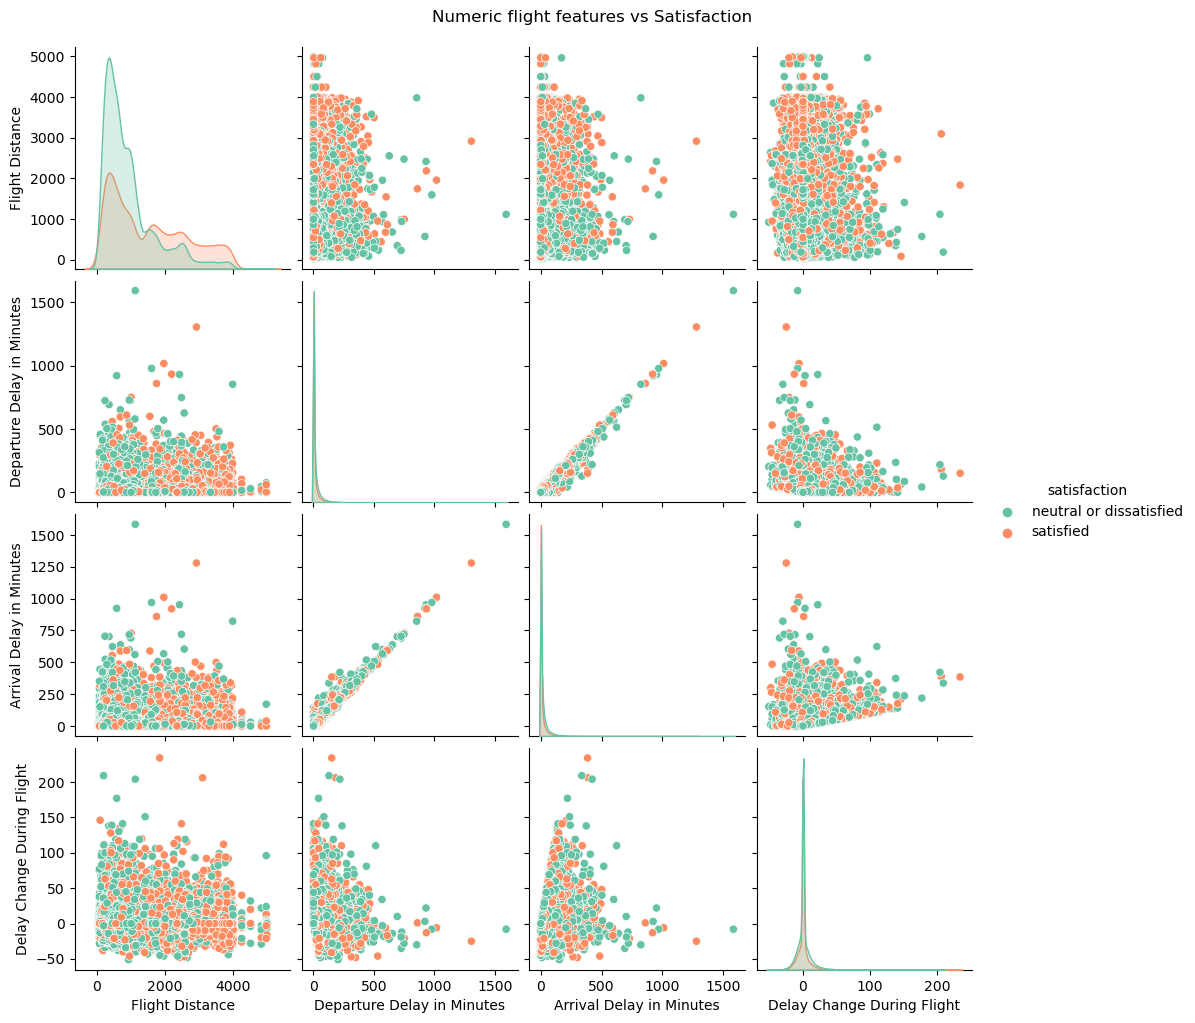

In [21]:
df_train["sum_assesments"]= df_train["Inflight wifi service"]+df_train["Online boarding"]+ df_train["Gate location"]+df_train["Baggage handling"]+ df_train["Checkin service"]+df_train["Seat comfort"]+df_train["Inflight service"]+df_train["Cleanliness"]

df_test["sum_assesments"]= df_test["Inflight wifi service"]+df_test["Online boarding"]+df_test["Gate location"]+df_test["Baggage handling"]+df_test["Checkin service"]+df_test["Seat comfort"]+df_test["Inflight service"]+df_test["Cleanliness"]

df_train["Delay Change During Flight"]=df_train["Arrival Delay in Minutes"]-df_train["Departure Delay in Minutes"]
df_test['Delay Change During Flight'] = df_test['Arrival Delay in Minutes'] - df_test['Departure Delay in Minutes']

flight_features=["Flight Distance", "Departure Delay in Minutes","Arrival Delay in Minutes","Delay Change During Flight"]

sns.pairplot(df_train[flight_features + ["satisfaction"]], hue="satisfaction", diag_kind="kde",palette="Set2")

plt.suptitle("Numeric flight features vs Satisfaction", y=1.02)
plt.show()

In [22]:
print(df_train.columns)


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'sum_assesments', 'Delay Change During Flight'],
      dtype='object')


In [23]:
def summarize_categoricals(df, features):
    summary_data = []
    
    for col in features:
        # Benzersiz değer sayısı
        n_unique = df[col].nunique()
        # Benzersiz değerlerin kendisi
        unique_vals = df[col].unique()
        
        # Listeye ekle
        summary_data.append({
            'Feature': col,
            'N_Unique': n_unique,
            'Unique Values': unique_vals
        })
    
    # DataFrame oluştur
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Fonksiyonu çağır ve tabloyu göster
cat_summary = summarize_categoricals(df_train, categorical_features)
display(cat_summary)

,Feature,N_Unique,Unique Values
0,Gender,2,"[Male, Female]"
1,Customer Type,2,"[Loyal Customer, disloyal Customer]"
2,Type of Travel,2,"[Personal Travel, Business travel]"
3,Class,3,"[Eco Plus, Business, Eco]"
4,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
5,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
6,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"
7,Gate location,6,"[1, 3, 2, 5, 4, 0]"
8,Food and drink,6,"[5, 1, 2, 4, 3, 0]"
9,Online boarding,6,"[3, 5, 2, 1, 4, 0]"


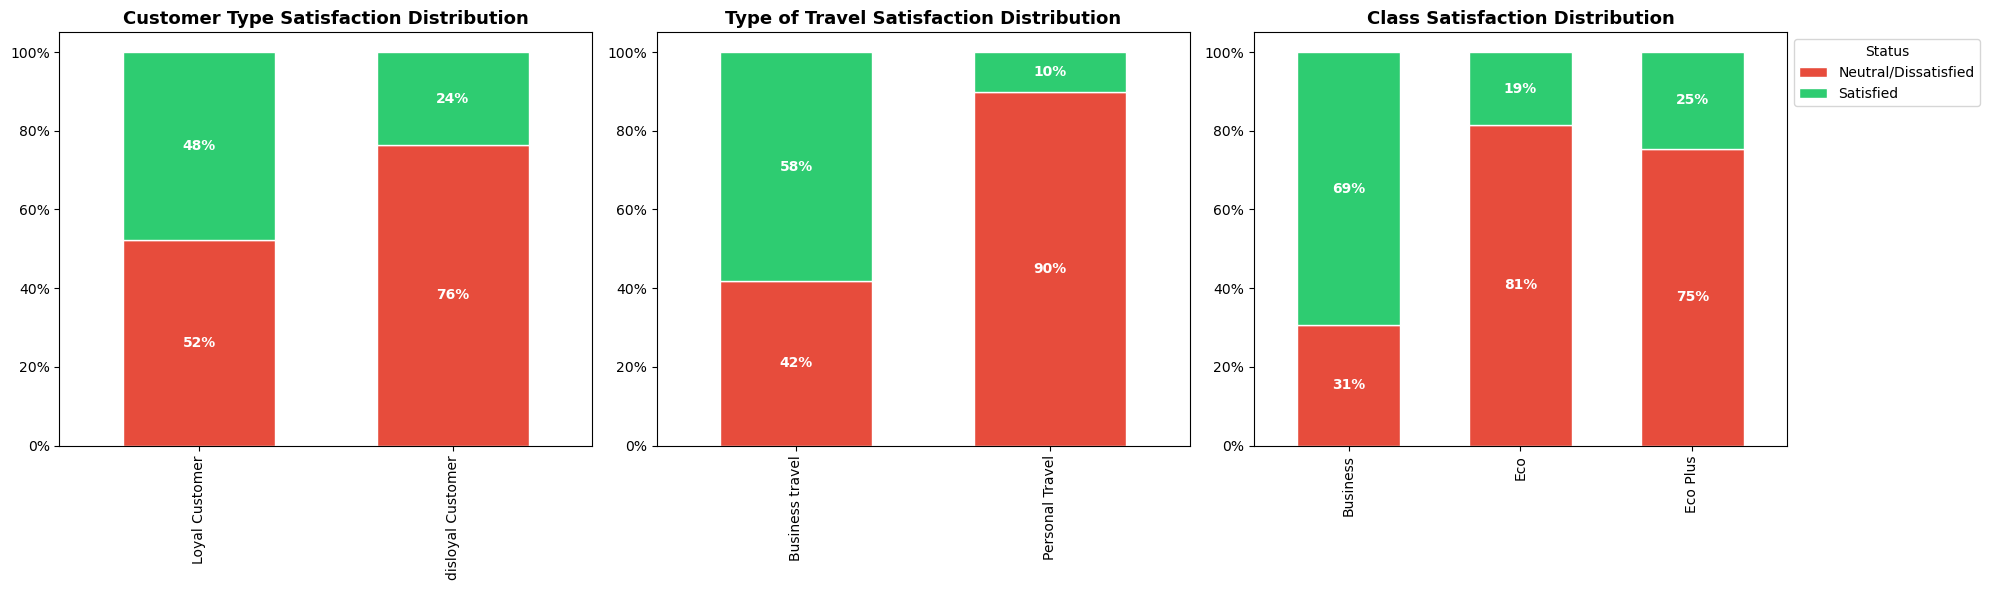

In [24]:
import matplotlib.ticker as mtick

def plot_demographic_satisfaction(df, features):
   
    
    colors = ['#e74c3c', '#2ecc71'] 
    
    fig, axes = plt.subplots(1, len(features), figsize=(20, 6))
    
    for i, feature in enumerate(features):
        ct = pd.crosstab(df[feature], df['satisfaction'], normalize='index')
        
        
        ct.plot(kind='bar', stacked=True, ax=axes[i], color=colors, edgecolor='white', width=0.6)
        
        axes[i].set_title(f'{feature} Satisfaction Distribution', fontsize=13, fontweight='bold')
        axes[i].set_xlabel('')
        
        
        axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        
        
        axes[i].get_legend().remove()
        
        
        for p in axes[i].patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            if height > 0.05: 
                axes[i].text(x + width/2, y + height/2, f'{height:.0%}', 
                             ha='center', va='center', color='white', fontweight='bold')

    
    axes[-1].legend(title='Status', labels=['Neutral/Dissatisfied', 'Satisfied'], 
                    bbox_to_anchor=(1, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()


demo_features = ['Customer Type', 'Type of Travel', 'Class']
plot_demographic_satisfaction(df_train, demo_features)

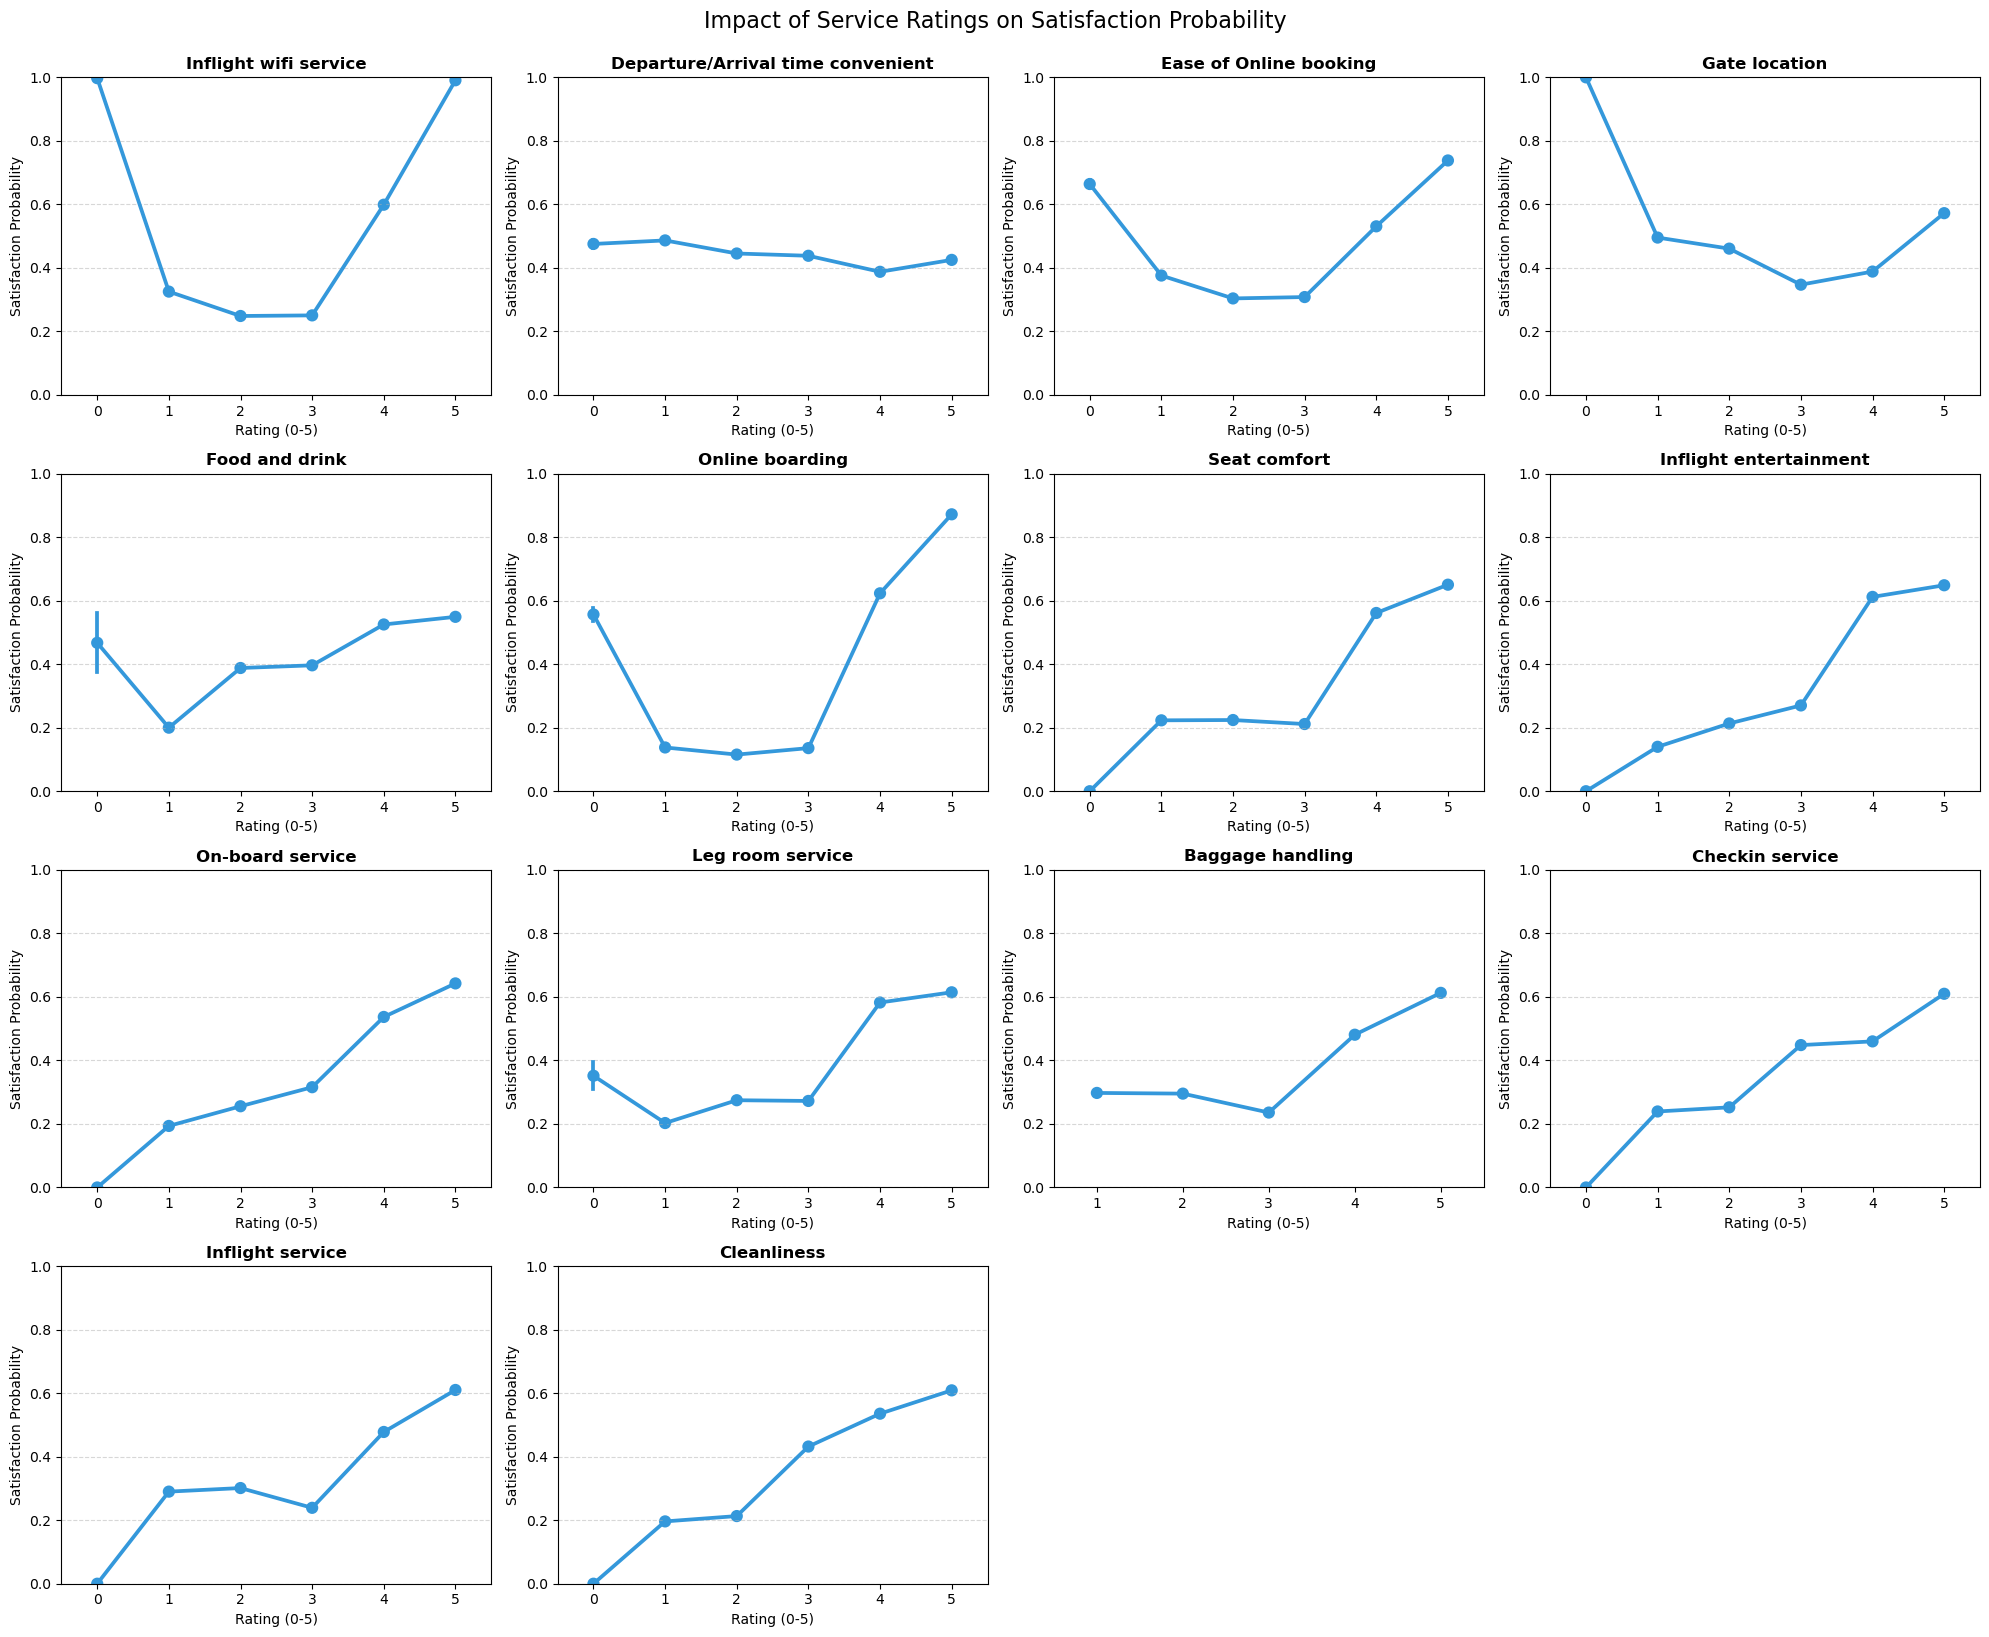

In [25]:
def plot_service_trends(df, features):
   
    rows = 4
    cols = 4
    fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
    axes = axes.flatten()
    
    
    temp_df = df.copy()
    if temp_df['satisfaction'].dtype == 'object':
         temp_df['satisfaction'] = temp_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

    for i, col in enumerate(features):
        
        sns.pointplot(data=temp_df, x=col, y='satisfaction', ax=axes[i], color='#3498db')
        
        axes[i].set_title(col, fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Satisfaction Probability')
        axes[i].set_xlabel('Rating (0-5)')
        axes[i].set_ylim(0, 1) 
        axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)

    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.suptitle('Impact of Service Ratings on Satisfaction Probability', y=1.02, fontsize=16)
    plt.show()


service_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                    'Inflight entertainment', 'On-board service', 'Leg room service', 
                    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

plot_service_trends(df_train, service_features)

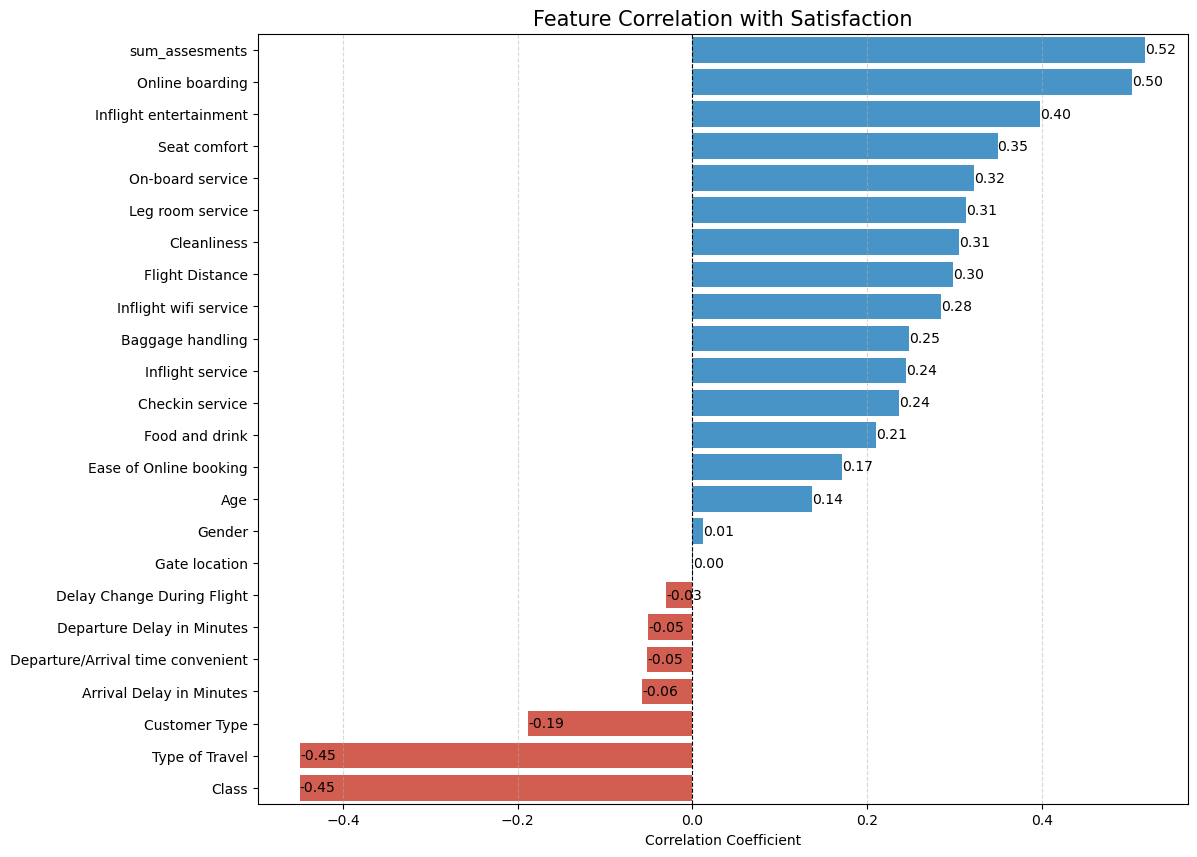

In [26]:
def plot_target_correlation(df, target='satisfaction'):
   
    corr_df = df.copy()
    
    
    for col in corr_df.select_dtypes(include='object').columns:
        corr_df[col] = corr_df[col].astype('category').cat.codes
    
    
    corr = corr_df.corr()[target].drop(target) 
    corr = corr.sort_values(ascending=False) 
    
    
    plt.figure(figsize=(12, 10))
    
    
    colors = ['#3498db' if x > 0 else '#e74c3c' for x in corr.values]
    
    sns.barplot(x=corr.values, y=corr.index, palette=colors)
    
    plt.title('Feature Correlation with Satisfaction', fontsize=15)
    plt.xlabel('Correlation Coefficient')
    plt.axvline(0, color='black', linestyle='--', linewidth=0.8) # Sıfır noktasına çizgi
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    
    
    for i, v in enumerate(corr.values):
        plt.text(v, i, f'{v:.2f}', va='center', fontsize=10, 
                 color='black' if abs(v) < 0.1 else 'black')
        
    plt.show()

plot_target_correlation(df_train, target='satisfaction')

In [39]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [optuna]2m3/4 [optuna]]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import optuna


def prepare_data(df, is_train=True):
    df = df.copy()
    
    
    if is_train and 'satisfaction' in df.columns:
        df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
    
    
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].astype('category')
        
    return df


df_train_final = prepare_data(df_train, is_train=True)
df_test_final = prepare_data(df_test, is_train=True) 


X = df_train_final.drop(columns=['satisfaction'])
y = df_train_final['satisfaction']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Eğitim Seti: {X_train.shape}, Validasyon Seti: {X_val.shape}")

Eğitim Seti: (83123, 24), Validasyon Seti: (20781, 24)


In [37]:
!pip install optuna-integration


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [39]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [49]:
import xgboost as xgb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np


def train_and_evaluate(params, X_train, y_train, X_val, y_val, model_name="XGBoost"):
    print(f"\n{'='*20} {model_name} Başlatılıyor... {'='*20}")
    
    
    clf = xgb.XGBClassifier(
        **params,
        enable_categorical=True,
        tree_method='hist',
        n_jobs=-1,
        eval_metric="logloss",          # <--- Buraya taşındı
        early_stopping_rounds=50,       # <--- Buraya taşındı (YENİ YERİ)
        callbacks=[xgb.callback.EvaluationMonitor(show_stdv=False)] 
    )
    
    
    clf.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        # eval_metric ve early_stopping_rounds buradan SİLİNDİ
        verbose=False
    )
    
    print(f"ℹ️  En İyi İterasyon: {clf.best_iteration}")
    print(f"ℹ️  En İyi Logloss: {clf.best_score:.5f}")
    
    
    y_pred = clf.predict(X_val)
    y_prob = clf.predict_proba(X_val)[:, 1]
    
    
    print(f"✅ Accuracy:  {accuracy_score(y_val, y_pred):.4f}")
    print(f"✅ F1 Score:  {f1_score(y_val, y_pred):.4f}")
    print(f"✅ ROC AUC:   {roc_auc_score(y_val, y_prob):.4f}")
    
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Gerçek')
    plt.xlabel('Tahmin')
    plt.show()
    
    return clf


==================== Base Model Başlatılıyor... ====================
[0]	validation_0-logloss:0.64667	validation_1-logloss:0.64670
[1]	validation_0-logloss:0.61273	validation_1-logloss:0.61280
[2]	validation_0-logloss:0.58182	validation_1-logloss:0.58191
[3]	validation_0-logloss:0.55363	validation_1-logloss:0.55372
[4]	validation_0-logloss:0.52782	validation_1-logloss:0.52788
[5]	validation_0-logloss:0.50416	validation_1-logloss:0.50421
[6]	validation_0-logloss:0.48241	validation_1-logloss:0.48258
[7]	validation_0-logloss:0.46216	validation_1-logloss:0.46231
[8]	validation_0-logloss:0.44356	validation_1-logloss:0.44374
[9]	validation_0-logloss:0.42636	validation_1-logloss:0.42658
[10]	validation_0-logloss:0.41026	validation_1-logloss:0.41055
[11]	validation_0-logloss:0.39534	validation_1-logloss:0.39556
[12]	validation_0-logloss:0.38122	validation_1-logloss:0.38143
[13]	validation_0-logloss:0.36795	validation_1-logloss:0.36816
[14]	validation_0-logloss:0.35557	validation_1-logloss:0.3

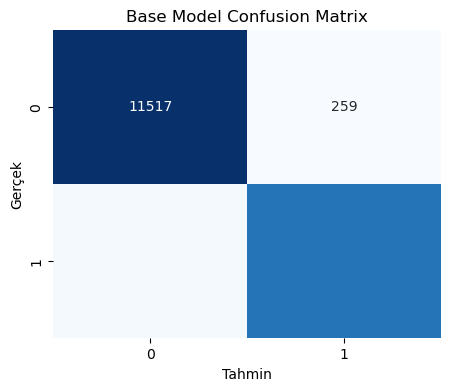

In [51]:

base_params = {
    'n_estimators': 2000,    
    'learning_rate': 0.05,   
    'max_depth': 6,          
    'random_state': 42
}


model_base = train_and_evaluate(base_params, X_train, y_train, X_val, y_val, "Base Model")

In [55]:
def objective(trial):
    
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'gamma': trial.suggest_float('gamma', 0, 2),
        
        
        'random_state': 42,
        'enable_categorical': True,
        'tree_method': 'hist',
        'n_jobs': -1,
        'eval_metric': 'logloss',      
        'early_stopping_rounds': 50    
    }
    
    
    model = xgb.XGBClassifier(**param_grid)
    
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=False
    )
    
    
    preds = model.predict(X_val)
    return f1_score(y_val, preds)

In [57]:


print("⏳ Optimizasyon Başlıyor... (Kahveni al, bu biraz sürebilir)")


optuna.logging.set_verbosity(optuna.logging.INFO)


study = optuna.create_study(direction='maximize') 


study.optimize(objective, n_trials=30)

print(f"\n🎯 BULUNAN EN İYİ SKOR (F1): {study.best_value:.4f}")
print("🎯 EN İYİ PARAMETRELER:", study.best_params)

[I 2025-11-19 19:00:38,490] A new study created in memory with name: no-name-9597c0c0-4620-45cb-b4e8-55a4bb6318a4


⏳ Optimizasyon Başlıyor... (Kahveni al, bu biraz sürebilir)


[I 2025-11-19 19:00:40,478] Trial 0 finished with value: 0.9590025833988542 and parameters: {'n_estimators': 2313, 'max_depth': 8, 'learning_rate': 0.057217344682386775, 'subsample': 0.7140839088908034, 'colsample_bytree': 0.8621325217358915, 'min_child_weight': 6, 'gamma': 1.539464066996671}. Best is trial 0 with value: 0.9590025833988542.
[I 2025-11-19 19:00:43,510] Trial 1 finished with value: 0.9577607000617042 and parameters: {'n_estimators': 1196, 'max_depth': 5, 'learning_rate': 0.06520787982485965, 'subsample': 0.8771105138153148, 'colsample_bytree': 0.915297817975424, 'min_child_weight': 1, 'gamma': 0.4504324543945659}. Best is trial 0 with value: 0.9590025833988542.
[I 2025-11-19 19:00:45,406] Trial 2 finished with value: 0.9595460164063377 and parameters: {'n_estimators': 2293, 'max_depth': 9, 'learning_rate': 0.04948712849904866, 'subsample': 0.8442580207317815, 'colsample_bytree': 0.9046389268895603, 'min_child_weight': 3, 'gamma': 0.2841195795584053}. Best is trial 2 with


🎯 BULUNAN EN İYİ SKOR (F1): 0.9600
🎯 EN İYİ PARAMETRELER: {'n_estimators': 2678, 'max_depth': 8, 'learning_rate': 0.0419839035716979, 'subsample': 0.6024865497343787, 'colsample_bytree': 0.6562368409849648, 'min_child_weight': 5, 'gamma': 1.311929218893012}


Using Final Parameters (simplified):
{'n_estimators': 2678, 'max_depth': 8, 'learning_rate': 0.0419839035716979, 'subsample': 0.6024865497343787, 'colsample_bytree': 0.6562368409849648, 'min_child_weight': 5, 'gamma': 1.311929218893012, 'random_state': 42}

==================== Final Optimized Model Başlatılıyor... ====================
[0]	validation_0-logloss:0.65494	validation_1-logloss:0.65494
[1]	validation_0-logloss:0.62488	validation_1-logloss:0.62493
[2]	validation_0-logloss:0.60066	validation_1-logloss:0.60070
[3]	validation_0-logloss:0.57424	validation_1-logloss:0.57434
[4]	validation_0-logloss:0.55358	validation_1-logloss:0.55371
[5]	validation_0-logloss:0.53374	validation_1-logloss:0.53387
[6]	validation_0-logloss:0.51240	validation_1-logloss:0.51259
[7]	validation_0-logloss:0.49739	validation_1-logloss:0.49755
[8]	validation_0-logloss:0.48041	validation_1-logloss:0.48068
[9]	validation_0-logloss:0.46135	validation_1-logloss:0.46174
[10]	validation_0-logloss:0.44610	validati

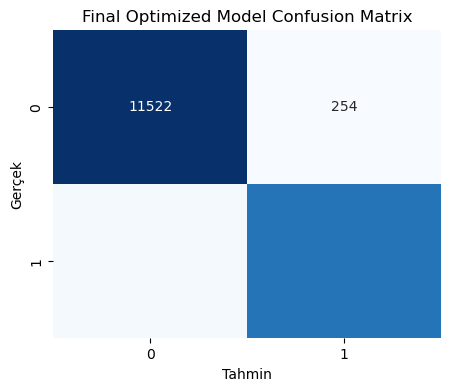

In [61]:
final_params = study.best_params.copy()


final_params['random_state'] = 42

print(f"Using Final Parameters (simplified):\n{final_params}")


final_model = train_and_evaluate(final_params, X_train, y_train, X_val, y_val, "Final Optimized Model")

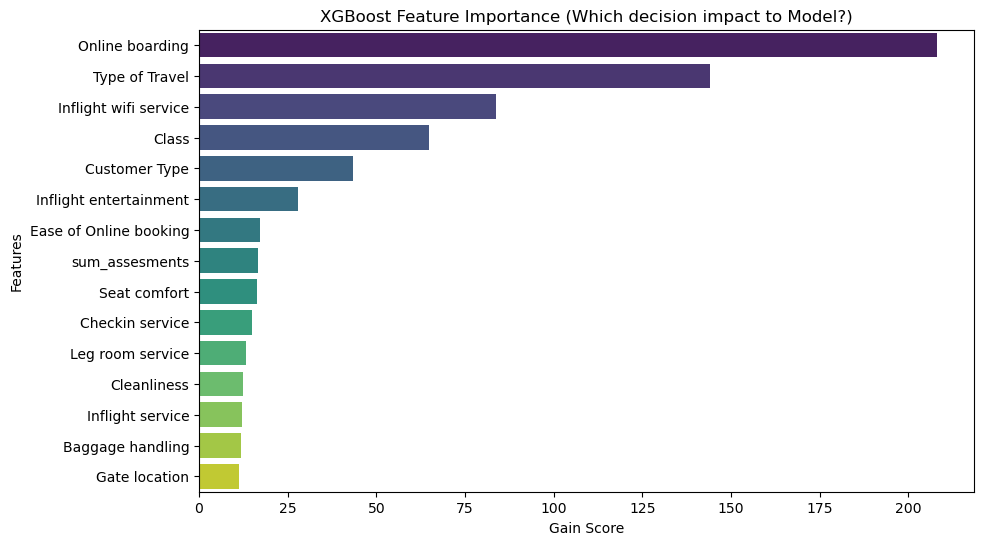

In [63]:

importance = final_model.get_booster().get_score(importance_type='gain')
imp_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Gain']).sort_values('Gain', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Gain', y='Feature', data=imp_df, palette='viridis')
plt.title('XGBoost Feature Importance (Which decision impact to Model?)')
plt.xlabel('Gain Score')
plt.ylabel('Features')
plt.show()